# Régression quantile illustrée

La régression quantile est moins sensible aux points aberrants. Elle peut être définie comme une régression avec une norme *L1* (une valeur absolue). Ce notebook explore des régressions avec des quantiles différents.

In [1]:
from jyquickhelper import add_notebook_menu

add_notebook_menu()

In [2]:
%matplotlib inline

## Un jeu de données non symétrique

In [3]:
import numpy.random as npr
import numpy

n = 1000
eps = npr.normal(n)
X = npr.rand(n, 1) * 5
X1 = npr.normal(size=(n, 1)) * 1
X2 = npr.normal(size=(n // 2, 1)) * 10
X2 = numpy.vstack([X2, numpy.zeros((n // 2, 1))])
eps = -numpy.abs(X1) + numpy.abs(X2)
Y = (0.5 * X + eps).ravel()
X.shape, Y.shape

((1000, 1), (1000,))

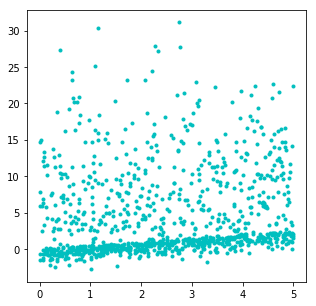

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(X, Y, "c.");

## Régression linéaire et régression quantile

In [5]:
from sklearn.linear_model import LinearRegression

clr = LinearRegression()
clr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
from mlinsights.mlmodel import QuantileLinearRegression

clq = QuantileLinearRegression()
clq.fit(X, Y)

QuantileLinearRegression(copy_X=True, delta=0.0001, fit_intercept=True,
             max_iter=10, n_jobs=1, normalize=False, quantile=0.5,
             verbose=False)

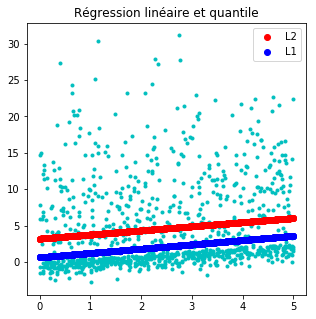

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(X, Y, "c.")
lin = clr.predict(X)
ax.plot(X, lin, "ro", label="L2")
qu = clq.predict(X)
ax.plot(X, qu, "bo", label="L1")
ax.legend()
ax.set_title("Régression linéaire et quantile");

## Différents quantiles

In [8]:
clqs = {}
for qu in [0.1, 0.25, 0.5, 0.75, 0.9]:
    clq = QuantileLinearRegression(quantile=qu)
    clq.fit(X, Y)
    clqs["q=%1.2f" % qu] = clq

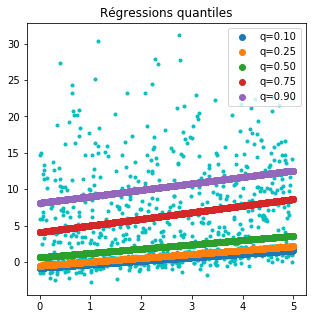

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(X, Y, "c.")
for k, v in sorted(clqs.items()):
    p = v.predict(X)
    ax.plot(X, p, "o", label=k)
ax.legend()
ax.set_title("Régressions quantiles");